## Big Home Assignment 2

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, classification_report

In [3]:
heart_attack_data = pd.read_csv("datasets_bigHA/heart_attack.csv", sep=',')
heart_attack_data.shape, heart_attack_data, heart_attack_data.isnull().sum()

((303, 14),
      age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
 0     63    1   3     145   233    1        0       150     0      2.3    0   
 1     37    1   2     130   250    0        1       187     0      3.5    0   
 2     41    0   1     130   204    0        0       172     0      1.4    2   
 3     56    1   1     120   236    0        1       178     0      0.8    2   
 4     57    0   0     120   354    0        1       163     1      0.6    2   
 ..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
 298   57    0   0     140   241    0        1       123     1      0.2    1   
 299   45    1   3     110   264    0        1       132     0      1.2    1   
 300   68    1   0     144   193    1        1       141     0      3.4    1   
 301   57    1   0     130   131    0        1       115     1      1.2    1   
 302   57    0   1     130   236    0        0       174     0      0.0    1   
 
      caa  thall  output  

In [4]:
quality_of_wine_data = pd.read_csv("datasets_bigHA/quality_of_wine.csv", sep=',')
quality_of_wine_data.shape, quality_of_wine_data, quality_of_wine_data.isnull().sum()

((32485, 14),
        Unnamed: 0  fixed acidity  volatile acidity  citric acid  \
 0            2732            7.4             0.170         0.29   
 1            2607            5.3             0.310         0.38   
 2            1653            4.7             0.145         0.29   
 3            3264            6.9             0.260         0.29   
 4            4931            6.4             0.450         0.07   
 ...           ...            ...               ...          ...   
 32480        2838            5.0             0.255         0.22   
 32481        6414            6.6             0.360         0.52   
 32482        1126            6.3             0.200         0.24   
 32483        2924            6.2             0.200         0.33   
 32484        5462            8.1             0.280         0.46   
 
        residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  \
 0                 1.4      0.047                 23.0                 107.0   
 1      

In [5]:
data_scientists_job_change_data = pd.read_csv("datasets_bigHA/Job_Change_of_Data_Scientists.csv", sep=',')
data_scientists_job_change_data.shape, data_scientists_job_change_data, data_scientists_job_change_data.isnull().sum()

((19158, 14),
        enrollee_id      city  city_development_index gender  \
 0             8949  city_103                   0.920   Male   
 1            29725   city_40                   0.776   Male   
 2            11561   city_21                   0.624    NaN   
 3            33241  city_115                   0.789    NaN   
 4              666  city_162                   0.767   Male   
 ...            ...       ...                     ...    ...   
 19153         7386  city_173                   0.878   Male   
 19154        31398  city_103                   0.920   Male   
 19155        24576  city_103                   0.920   Male   
 19156         5756   city_65                   0.802   Male   
 19157        23834   city_67                   0.855    NaN   
 
            relevent_experience enrolled_university education_level  \
 0      Has relevent experience       no_enrollment        Graduate   
 1       No relevent experience       no_enrollment        Graduate   
 2 

In [6]:
data_scientists_job_change_data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


## Preprocessing

In [7]:
data_scientists_job_change_data.columns = ['enrollee_id', 'city_nom', 'city_development_index', 'gender_nom',
       'relevent_experience_nom', 'enrolled_university_nom', 'education_level_ord',
       'major_discipline_nom', 'experience_ord', 'company_size_ord', 'company_type_nom',
       'last_new_job_ord', 'training_hours', 'target']

In [8]:
del data_scientists_job_change_data["enrollee_id"]

In [9]:
def OrdMapping(df):
    
    
    education_level_ord_mapping = {'Primary School': 0,'High School': 1,'Graduate': 2 , 'Masters':3,'Phd': 4 }
    experience_ord_mapping= {'<1':0, '1':2, '2':3, '3':4,'4':5, '5':6, '6':7, '7':8, '8':9,'9':10, '10':11, '12':13, '13':14,'14':15, '15':16, '16':17,  '17':18,'18':19, '19':20,'20':21,'>20':22}
    company_size_ord_mapping = {'<10':0 ,'10/49':1,'50-99':2, '100-500':3, '500-999':4, '1000-4999':5,'5000-9999':6, '10000+':7}
    
    last_new_job_ord_mapping = {'never':0,'1':1,'2':2,'3':3,'4':4,'>4':5}
    df['education_level_ord'] = df.education_level_ord.map(education_level_ord_mapping)
    df['experience_ord'] = df.experience_ord.map(experience_ord_mapping)
    df['company_size_ord'] = df.company_size_ord.map(company_size_ord_mapping)
    df['last_new_job_ord'] = df.last_new_job_ord.map(last_new_job_ord_mapping)
     
    return df

In [10]:
data_scientists_job_change_data = OrdMapping(data_scientists_job_change_data)

In [11]:
ordinals = [c for c in data_scientists_job_change_data.columns if 'ord' in c]
nominals = [c for c in data_scientists_job_change_data.columns if 'nom' in c]

In [12]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler

for c in nominals:
    le = LabelEncoder()
    le.fit(list(data_scientists_job_change_data[c].astype(str)))
    data_scientists_job_change_data[c] = le.transform(data_scientists_job_change_data[c].astype(str))
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print('target mapping :  ',c ,  le_name_mapping)

target mapping :   city_nom {'city_1': 0, 'city_10': 1, 'city_100': 2, 'city_101': 3, 'city_102': 4, 'city_103': 5, 'city_104': 6, 'city_105': 7, 'city_106': 8, 'city_107': 9, 'city_109': 10, 'city_11': 11, 'city_111': 12, 'city_114': 13, 'city_115': 14, 'city_116': 15, 'city_117': 16, 'city_118': 17, 'city_12': 18, 'city_120': 19, 'city_121': 20, 'city_123': 21, 'city_126': 22, 'city_127': 23, 'city_128': 24, 'city_129': 25, 'city_13': 26, 'city_131': 27, 'city_133': 28, 'city_134': 29, 'city_136': 30, 'city_138': 31, 'city_139': 32, 'city_14': 33, 'city_140': 34, 'city_141': 35, 'city_142': 36, 'city_143': 37, 'city_144': 38, 'city_145': 39, 'city_146': 40, 'city_149': 41, 'city_150': 42, 'city_152': 43, 'city_155': 44, 'city_157': 45, 'city_158': 46, 'city_159': 47, 'city_16': 48, 'city_160': 49, 'city_162': 50, 'city_165': 51, 'city_166': 52, 'city_167': 53, 'city_171': 54, 'city_173': 55, 'city_175': 56, 'city_176': 57, 'city_179': 58, 'city_18': 59, 'city_180': 60, 'city_19': 61,

In [13]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer

cats = ordinals + nominals

imp = SimpleImputer(strategy = "most_frequent")
data_scientists_job_change_data[cats] = imp.fit_transform(data_scientists_job_change_data[cats])

In [14]:
data_scientists_job_change_data.isnull().sum()

city_nom                   0
city_development_index     0
gender_nom                 0
relevent_experience_nom    0
enrolled_university_nom    0
education_level_ord        0
major_discipline_nom       0
experience_ord             0
company_size_ord           0
company_type_nom           0
last_new_job_ord           0
training_hours             0
target                     0
dtype: int64

In [15]:
nums = [c for c in data_scientists_job_change_data.columns if c not in cats]

In [16]:
ss = StandardScaler()
data_scientists_job_change_data[nums] = ss.fit_transform(data_scientists_job_change_data[nums])

In [17]:
data_scientists_job_change_data.shape, data_scientists_job_change_data, data_scientists_job_change_data.isnull().sum()

((19158, 13),
        city_nom  city_development_index  gender_nom  relevent_experience_nom  \
 0           5.0                0.738919         1.0                      0.0   
 1          77.0               -0.428410         1.0                      1.0   
 2          64.0               -1.660590         3.0                      1.0   
 3          14.0               -0.323026         3.0                      1.0   
 4          50.0               -0.501368         1.0                      0.0   
 ...         ...                     ...         ...                      ...   
 19153      55.0                0.398448         1.0                      1.0   
 19154       5.0                0.738919         1.0                      0.0   
 19155       5.0                0.738919         1.0                      0.0   
 19156      94.0               -0.217642         1.0                      0.0   
 19157      95.0                0.212000         3.0                      1.0   
 
        enro

## Task part
Now we will perform classification on our selected data using standard ML tools.

In [18]:
from xgboost import XGBClassifier

def xGboost_flow(X_train, X_test, y_train, y_test, n_estimators=500, max_depth=5, 
                 learning_rate=0.5, colsample_bytree=0.70, n_jobs=4, objective='binary:logistic'):
    best_f1_score = 0.5
    best_learning_rate = learning_rate
    
    while learning_rate > 0.01:
        classifier = XGBClassifier(n_estimators=n_estimators, max_depth=max_depth, 
                               learning_rate=learning_rate, objective=objective, 
                               colsample_bytree=colsample_bytree, n_jobs=n_jobs)
        accuracies = cross_val_score(classifier, X_train, y_train, scoring="accuracy", cv = 5)
        print(f"accuracy mean value: {accuracies.mean()}")
        print(f"accuracy STD value: {accuracies.std()}")
        print(f"========================================")
        
        if accuracies.mean() < best_f1_score:
            best_f1_score = accuracies.mean()
            best_learning_rate = learning_rate
            
        learning_rate -= 0.05
    
    final_classifier = XGBClassifier(n_estimators=n_estimators, max_depth=max_depth, 
                               learning_rate=best_learning_rate, objective=objective, 
                               colsample_bytree=colsample_bytree, n_jobs=n_jobs)
    final_classifier.fit(X_train, y_train)
    plt.figure(figsize=(17, 10))
    sns.barplot(x = X_train.columns, y = final_classifier.feature_importances_)
    
    print(f"XgBoost test Accuracy: {final_classifier.score(X_test, y_test)}")
    print(f"XgBoost test F1 Score\n: {classification_report(y_test, final_classifier.predict(X_test))}")

In [19]:
from sklearn.linear_model import LogisticRegression

def logreg_flow(X_train, X_test, y_train, y_test, C=100):
    best_f1_score = 0
    best_C = C
    
    while C < 1000:
        classifier = LogisticRegression(solver='liblinear', C=C)
        accuracies = cross_val_score(classifier, X_train, y_train, scoring="accuracy", cv = 10)
        print(f"accuracy mean value: {accuracies.mean()}")
        print(f"accuracy STD value: {accuracies.std()}")
        print(f"========================================")
        
        if accuracies.mean() > best_f1_score:
            best_f1_score = accuracies.mean()
            best_C = C
            
        C += 100
        
    final_classifier = LogisticRegression(solver='liblinear', C=best_C)
    final_classifier.fit(X_train, y_train)
    
    print(f"LogisticRegression test Accuracy: {final_classifier.score(X_test, y_test)}")
    print(f"LogisticRegression test F1 Score\n: {classification_report(y_test, final_classifier.predict(X_test))}")

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions

def knn_flow(X_train, X_test, y_train, y_test, n_neighbors=3):
    best_f1_score = 0
    neighbors = n_neighbors
    best_neighbors_count = neighbors
    
    while neighbors < n_neighbors * 3:
        classifier = KNeighborsClassifier(n_neighbors=neighbors)
        accuracies = cross_val_score(classifier, X_train, y_train, scoring="accuracy", cv = 10)
        print(f"accuracy mean value: {accuracies.mean()}")
        print(f"accuracy STD value: {accuracies.std()}")
        print(f"========================================")
        
        if accuracies.mean() > best_f1_score:
            best_f1_score = accuracies.mean()
            best_neighbors_count = neighbors
            
        neighbors += 1
        
    final_classifier = KNeighborsClassifier(n_neighbors=best_neighbors_count)
    final_classifier.fit(X_train, y_train)
    
    print(f"Knn test Accuracy: {final_classifier.score(X_test, y_test)}")
    print(f"Knn test F1 Score\n: {classification_report(y_test, final_classifier.predict(X_test))}")

In [33]:
from catboost import CatBoostClassifier
from catboost import Pool
from catboost import cv

def catboost_flow(X_train, X_test, y_train, y_test, iterations=10, learning_rate=0.5):
    best_f1_score = 0
    best_learning_rate = learning_rate
    
    while learning_rate > 0.01:
        classifier = CatBoostClassifier(iterations=iterations, learning_rate=learning_rate, task_type='GPU')
        
        train_pool = Pool(data=X_train, label=y_train, has_header=True)
        params = {
            'loss_function': 'Logloss',
            'iterations': iterations,
            'learning_rate': learning_rate,
            'eval_metric' : 'TotalF1',
        }
        cv_data = cv(
            params = params,
            pool = train_pool,
            fold_count=5,
            shuffle=True,
            partition_random_seed=0,
            plot=True,
            stratified=False,
            verbose=False
        )
        
        f1_mean = cv_data['train-TotalF1-mean'][1]
        print(f"f1-score mean value: {f1_mean}")
        print(f"f1-score STD value: {cv_data['train-TotalF1-std']}")
        print(f"========================================")
        
        if f1_mean > best_f1_score:
            best_f1_score = f1_mean
            best_learning_rate = learning_rate
            
        learning_rate -= 0.05
    
    final_classifier = CatBoostClassifier(iterations=iterations, learning_rate=best_learning_rate, task_type='CPU')
    final_classifier.fit(X_train, y_train)
    plt.figure(figsize=(17, 10))
    sns.barplot(x = X_train.columns, y = final_classifier.feature_importances_)
    
    print(f"Catboost test Accuracy: {final_classifier.score(X_test, y_test)}")
    print(f"Catboost test F1 Score\n: {classification_report(y_test, final_classifier.predict(X_test))}")

## Split of the data and future model analysis

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Binarizer, LabelEncoder

In [23]:
# Let's split our datasets to train and test subsets
le = LabelEncoder()

heart_attack_target = heart_attack_data['output']
heart_attack_data = heart_attack_data.drop(columns = ['output'], axis = 1)

for col in heart_attack_data.columns :
    le.fit(heart_attack_data[col])
    heart_attack_data[col] = le.transform(heart_attack_data[col])

heart_attack_X_train, heart_attack_X_test, heart_attack_y_train, heart_attack_y_test = train_test_split(heart_attack_data, heart_attack_target, test_size=.2)

Heart attacks research:
accuracy mean value: 0.8345238095238094
accuracy STD value: 0.02718748994339125
accuracy mean value: 0.8261904761904763
accuracy STD value: 0.04135434102471258
accuracy mean value: 0.8096938775510203
accuracy STD value: 0.042991905603605336
accuracy mean value: 0.8054421768707481
accuracy STD value: 0.05423583778495557
accuracy mean value: 0.8221938775510205
accuracy STD value: 0.04497358864178472
accuracy mean value: 0.8180272108843537
accuracy STD value: 0.04272737074133933
accuracy mean value: 0.8137755102040816
accuracy STD value: 0.04968781246891197
accuracy mean value: 0.8220238095238095
accuracy STD value: 0.05221780848854876
accuracy mean value: 0.8096088435374149
accuracy STD value: 0.04873747319034684
accuracy mean value: 0.8096938775510203
accuracy STD value: 0.04867378432752734
XgBoost test Accuracy: 0.7704918032786885
XgBoost test F1 Score
:               precision    recall  f1-score   support

           0       0.76      0.76      0.76        29


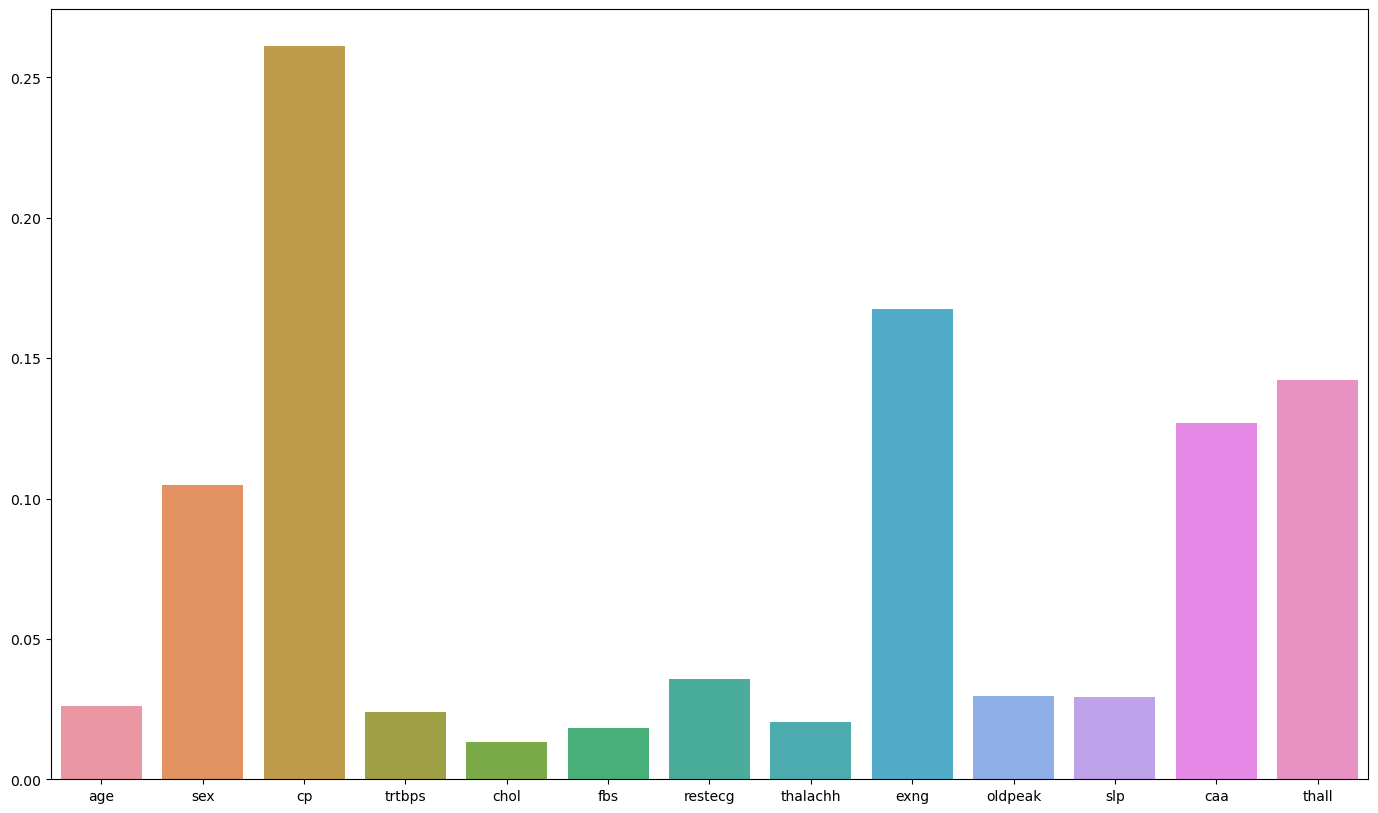

In [24]:
print("Heart attacks research:")
xGboost_flow(heart_attack_X_train, heart_attack_X_test, heart_attack_y_train, heart_attack_y_test)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.8976098784
bestIteration = 3

Training on fold [1/5]

bestTest = 0.8380014075
bestIteration = 2

Training on fold [2/5]

bestTest = 0.8333333333
bestIteration = 4

Training on fold [3/5]

bestTest = 0.8324514991
bestIteration = 0

Training on fold [4/5]

bestTest = 0.9372469636
bestIteration = 5

f1-score mean value: 0.8881202534588415
f1-score STD value: 0    0.011591
1    0.018094
2    0.019395
3    0.014578
4    0.011868
5    0.015379
6    0.018618
7    0.009930
8    0.005647
9    0.005877
Name: train-TotalF1-std, dtype: float64


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.8976098784
bestIteration = 3

Training on fold [1/5]

bestTest = 0.8171247639
bestIteration = 3

Training on fold [2/5]

bestTest = 0.8129113646
bestIteration = 0

Training on fold [3/5]

bestTest = 0.8324514991
bestIteration = 0

Training on fold [4/5]

bestTest = 0.875
bestIteration = 6

f1-score mean value: 0.8941603158478078
f1-score STD value: 0    0.011591
1    0.016498
2    0.021299
3    0.016258
4    0.015379
5    0.013397
6    0.009678
7    0.009662
8    0.012329
9    0.007654
Name: train-TotalF1-std, dtype: float64


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.8976098784
bestIteration = 3

Training on fold [1/5]

bestTest = 0.8171247639
bestIteration = 7

Training on fold [2/5]

bestTest = 0.8129113646
bestIteration = 0

Training on fold [3/5]

bestTest = 0.8324514991
bestIteration = 0

Training on fold [4/5]

bestTest = 0.9372469636
bestIteration = 6

f1-score mean value: 0.8929971892294857
f1-score STD value: 0    0.011591
1    0.013740
2    0.014068
3    0.018539
4    0.018204
5    0.015125
6    0.019823
7    0.015245
8    0.012120
9    0.007823
Name: train-TotalF1-std, dtype: float64


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.8766009852
bestIteration = 4

Training on fold [1/5]

bestTest = 0.8153499769
bestIteration = 6

Training on fold [2/5]

bestTest = 0.853713969
bestIteration = 9

Training on fold [3/5]

bestTest = 0.8324514991
bestIteration = 0

Training on fold [4/5]

bestTest = 0.9166666667
bestIteration = 5

f1-score mean value: 0.8785126200344899
f1-score STD value: 0    0.011591
1    0.012658
2    0.022157
3    0.017992
4    0.016309
5    0.014962
6    0.015231
7    0.018397
8    0.007812
9    0.010079
Name: train-TotalF1-std, dtype: float64


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.8976098784
bestIteration = 3

Training on fold [1/5]

bestTest = 0.8171247639
bestIteration = 9

Training on fold [2/5]

bestTest = 0.8339160839
bestIteration = 5

Training on fold [3/5]

bestTest = 0.8324514991
bestIteration = 0

Training on fold [4/5]

bestTest = 0.9579552329
bestIteration = 4

f1-score mean value: 0.8880383939628331
f1-score STD value: 0    0.011591
1    0.021320
2    0.015069
3    0.021494
4    0.017363
5    0.006347
6    0.012325
7    0.010064
8    0.005231
9    0.005887
Name: train-TotalF1-std, dtype: float64


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.8766009852
bestIteration = 3

Training on fold [1/5]

bestTest = 0.7975017593
bestIteration = 0

Training on fold [2/5]

bestTest = 0.8333333333
bestIteration = 9

Training on fold [3/5]

bestTest = 0.8324514991
bestIteration = 0

Training on fold [4/5]

bestTest = 0.9579552329
bestIteration = 4

f1-score mean value: 0.8778279789082202
f1-score STD value: 0    0.011591
1    0.011630
2    0.028840
3    0.019895
4    0.021057
5    0.016253
6    0.016962
7    0.016909
8    0.012391
9    0.012908
Name: train-TotalF1-std, dtype: float64


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.8766009852
bestIteration = 2

Training on fold [1/5]

bestTest = 0.7975017593
bestIteration = 0

Training on fold [2/5]

bestTest = 0.8129113646
bestIteration = 0

Training on fold [3/5]

bestTest = 0.8324514991
bestIteration = 0

Training on fold [4/5]

bestTest = 0.8926619828
bestIteration = 8

f1-score mean value: 0.8726061928551484
f1-score STD value: 0    0.011591
1    0.009407
2    0.018564
3    0.012034
4    0.013038
5    0.007489
6    0.009821
7    0.011872
8    0.014049
9    0.019030
Name: train-TotalF1-std, dtype: float64


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.8766009852
bestIteration = 2

Training on fold [1/5]

bestTest = 0.8153499769
bestIteration = 5

Training on fold [2/5]

bestTest = 0.8129113646
bestIteration = 0

Training on fold [3/5]

bestTest = 0.8324514991
bestIteration = 0

Training on fold [4/5]

bestTest = 0.8722222222
bestIteration = 6

f1-score mean value: 0.8682834100815018
f1-score STD value: 0    0.011591
1    0.007849
2    0.017588
3    0.012420
4    0.016583
5    0.015061
6    0.018959
7    0.017420
8    0.017896
9    0.016375
Name: train-TotalF1-std, dtype: float64


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.8766009852
bestIteration = 5

Training on fold [1/5]

bestTest = 0.8367346939
bestIteration = 9

Training on fold [2/5]

bestTest = 0.8132352941
bestIteration = 5

Training on fold [3/5]

bestTest = 0.8324514991
bestIteration = 0

Training on fold [4/5]

bestTest = 0.8722222222
bestIteration = 6

f1-score mean value: 0.8715185497128498
f1-score STD value: 0    0.011591
1    0.008492
2    0.026217
3    0.019772
4    0.026928
5    0.018723
6    0.016284
7    0.015021
8    0.018432
9    0.015462
Name: train-TotalF1-std, dtype: float64


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.8766009852
bestIteration = 3

Training on fold [1/5]

bestTest = 0.7975017593
bestIteration = 0

Training on fold [2/5]

bestTest = 0.8129113646
bestIteration = 0

Training on fold [3/5]

bestTest = 0.8324514991
bestIteration = 0

Training on fold [4/5]

bestTest = 0.8942586654
bestIteration = 6

f1-score mean value: 0.8778092157701431
f1-score STD value: 0    0.011591
1    0.016638
2    0.012821
3    0.007816
4    0.007647
5    0.012034
6    0.014222
7    0.013486
8    0.016215
9    0.019830
Name: train-TotalF1-std, dtype: float64
0:	learn: 0.5669955	total: 1.86ms	remaining: 16.7ms
1:	learn: 0.4942642	total: 2.68ms	remaining: 10.7ms
2:	learn: 0.4469945	total: 3.39ms	remaining: 7.91ms
3:	learn: 0.4104358	total: 4.17ms	remaining: 6.25ms
4:	learn: 0.3797770	total: 5.03ms	remaining: 5.03ms
5:	learn: 0.3523515	total: 5.84ms	remaining: 3.9ms
6:	learn: 0.3282172	total: 6.68ms	remaining: 2.86ms
7:	learn: 0.3117196	total: 7.53ms	remaining: 1.88ms
8:	learn: 

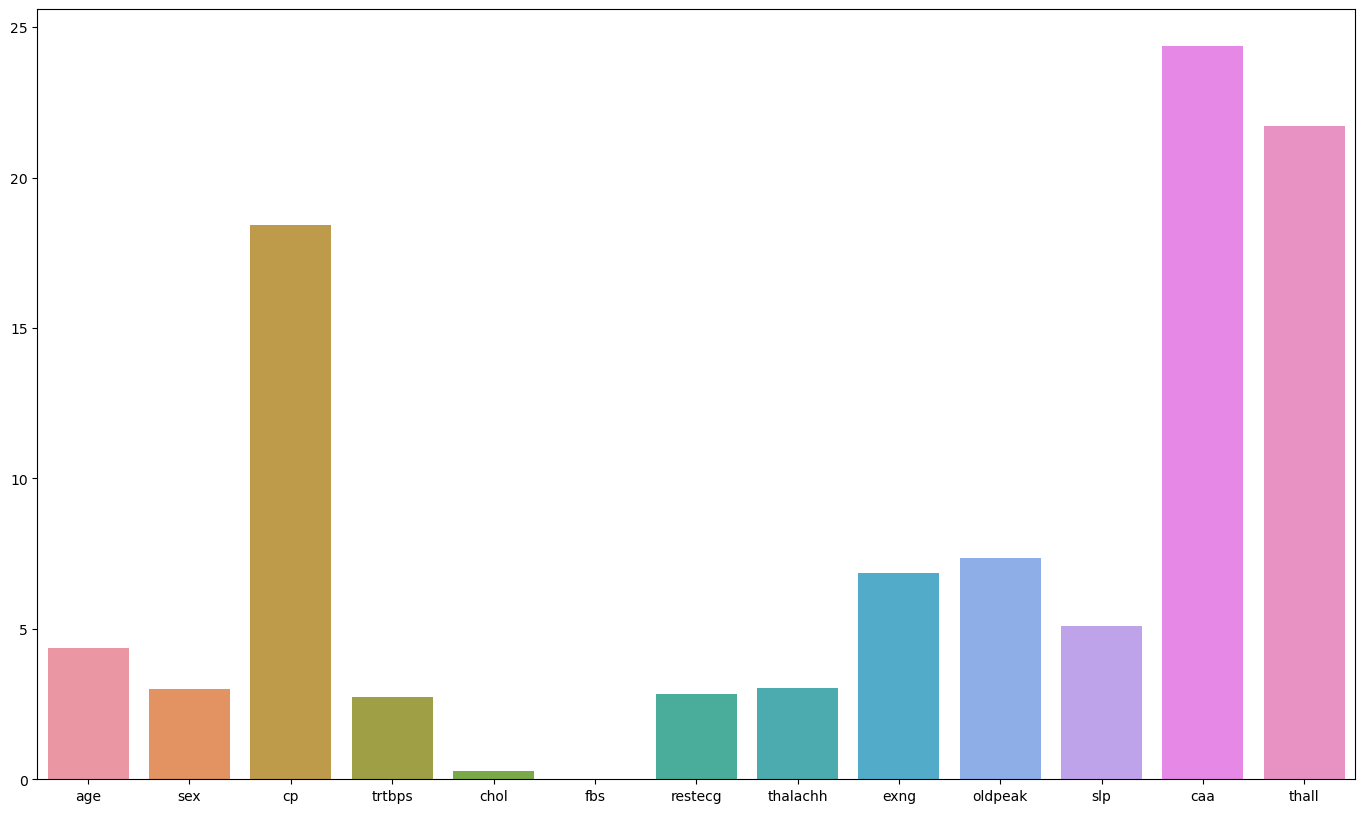

In [34]:
catboost_flow(heart_attack_X_train, heart_attack_X_test, heart_attack_y_train, heart_attack_y_test)

In [35]:
logreg_flow(heart_attack_X_train, heart_attack_X_test, heart_attack_y_train, heart_attack_y_test)

accuracy mean value: 0.8093333333333333
accuracy STD value: 0.07118910653245263
accuracy mean value: 0.8093333333333333
accuracy STD value: 0.07118910653245263
accuracy mean value: 0.8093333333333333
accuracy STD value: 0.07118910653245263
accuracy mean value: 0.8093333333333333
accuracy STD value: 0.07118910653245263
accuracy mean value: 0.8093333333333333
accuracy STD value: 0.07118910653245263
accuracy mean value: 0.8093333333333333
accuracy STD value: 0.07118910653245263
accuracy mean value: 0.8093333333333333
accuracy STD value: 0.07118910653245263
accuracy mean value: 0.8093333333333333
accuracy STD value: 0.07118910653245263
accuracy mean value: 0.8093333333333333
accuracy STD value: 0.07118910653245263
LogisticRegression test Accuracy: 0.8524590163934426
LogisticRegression test F1 Score
:               precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                

In [36]:
knn_flow(heart_attack_X_train, heart_attack_X_test, heart_attack_y_train, heart_attack_y_test)

accuracy mean value: 0.6775
accuracy STD value: 0.07224668389160384
accuracy mean value: 0.6443333333333333
accuracy STD value: 0.09239769116884541
accuracy mean value: 0.6686666666666666
accuracy STD value: 0.07436695801526674
accuracy mean value: 0.6315000000000001
accuracy STD value: 0.09047851187498117
accuracy mean value: 0.6519999999999999
accuracy STD value: 0.09376329535354203
accuracy mean value: 0.6401666666666668
accuracy STD value: 0.08640489312275985
Knn test Accuracy: 0.639344262295082
Knn test F1 Score
:               precision    recall  f1-score   support

           0       0.64      0.55      0.59        29
           1       0.64      0.72      0.68        32

    accuracy                           0.64        61
   macro avg       0.64      0.64      0.63        61
weighted avg       0.64      0.64      0.64        61



In [39]:
binarizer = Binarizer(threshold=5)
le = LabelEncoder()

quality_of_wine_target = binarizer.transform(quality_of_wine_data['quality'].values.reshape(-1,1))
quality_of_wine_data['Type'] = le.fit_transform(quality_of_wine_data['Type'])

quality_of_wine_data = quality_of_wine_data.drop(columns = ['quality'], axis = 1)

quality_of_wine_X_train, quality_of_wine_X_test, quality_of_wine_y_train, quality_of_wine_y_test = train_test_split(quality_of_wine_data, quality_of_wine_target, test_size=.2)

accuracy mean value: 0.9936509823829904
accuracy STD value: 0.0024966462564215484
accuracy mean value: 0.9939972916271655
accuracy STD value: 0.0020266177820387524
accuracy mean value: 0.9942281052280807
accuracy STD value: 0.0020143625355249794
accuracy mean value: 0.993535568178966
accuracy STD value: 0.0020235612377707828
accuracy mean value: 0.9936509675758568
accuracy STD value: 0.0018006778637972296
accuracy mean value: 0.9936895031414444
accuracy STD value: 0.0017350916209070012
accuracy mean value: 0.9913037703478705
accuracy STD value: 0.0016019537220383522
accuracy mean value: 0.984531483409014
accuracy STD value: 0.0020732402481958494
accuracy mean value: 0.965445695096092
accuracy STD value: 0.00454190619408107
accuracy mean value: 0.9177699375649802
accuracy STD value: 0.007345694798753688
XgBoost test Accuracy: 0.9972294905340927
XgBoost test F1 Score
:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2498
           

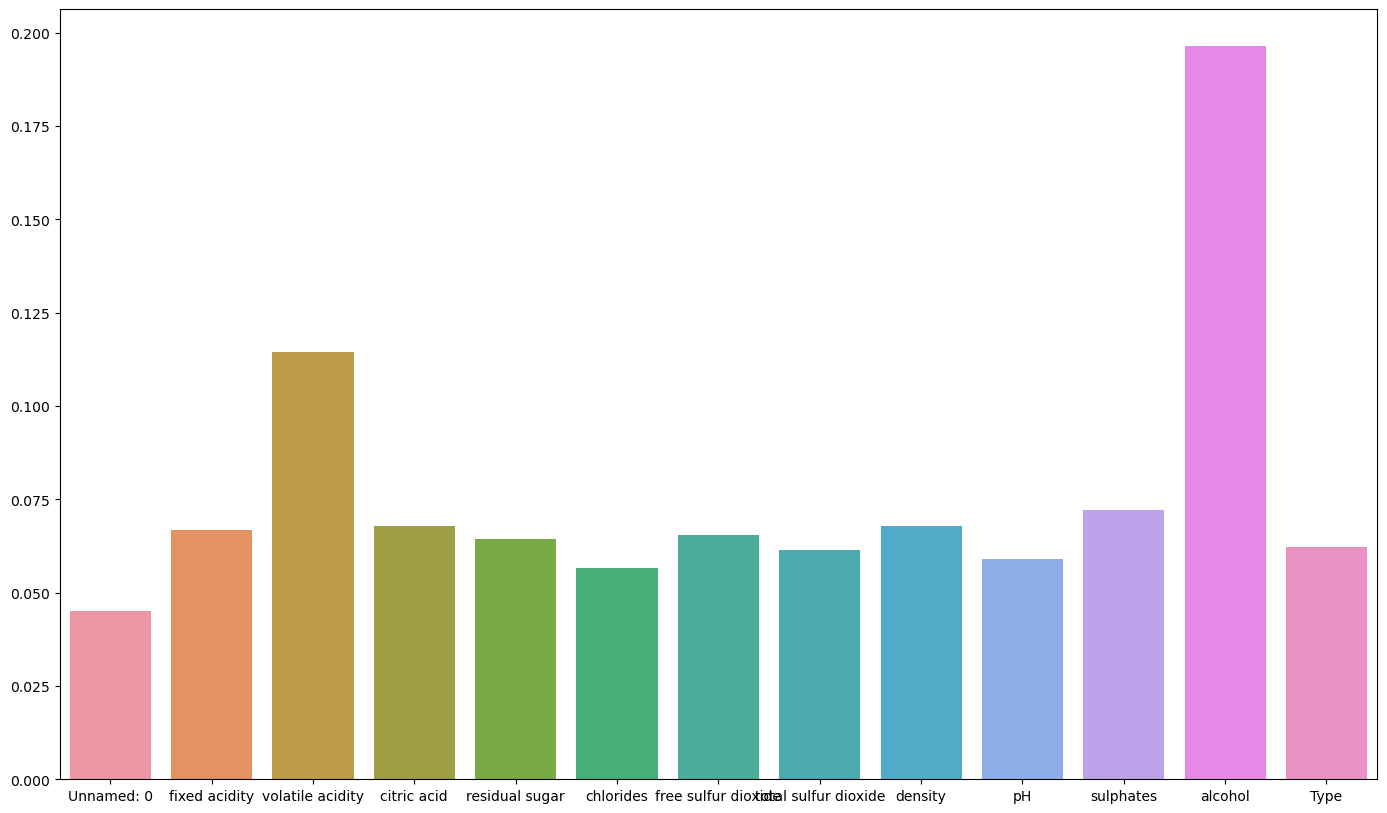

In [40]:
xGboost_flow(quality_of_wine_X_train, quality_of_wine_X_test, quality_of_wine_y_train, quality_of_wine_y_test)

In [41]:
logreg_flow(quality_of_wine_X_train, quality_of_wine_X_test, quality_of_wine_y_train, quality_of_wine_y_test)

accuracy mean value: 0.7318773194285361
accuracy STD value: 0.013541732311856718
accuracy mean value: 0.728182495132699
accuracy STD value: 0.013825466833490363
accuracy mean value: 0.7258353941425331
accuracy STD value: 0.013476925404531173
accuracy mean value: 0.7268359862456722
accuracy STD value: 0.012528878926391804
accuracy mean value: 0.7276823027510135
accuracy STD value: 0.012256410396324517
accuracy mean value: 0.7269907950028747
accuracy STD value: 0.01109035690824359
accuracy mean value: 0.7325313875384653
accuracy STD value: 0.011561523773664604
accuracy mean value: 0.7289521551636045
accuracy STD value: 0.013557599325262685
accuracy mean value: 0.7265665334064354
accuracy STD value: 0.012882986360404833
LogisticRegression test Accuracy: 0.7378790210866554
LogisticRegression test F1 Score
:               precision    recall  f1-score   support

           0       0.71      0.53      0.61      2498
           1       0.75      0.87      0.80      3999

    accuracy         

In [42]:
knn_flow(quality_of_wine_X_train, quality_of_wine_X_test, quality_of_wine_y_train, quality_of_wine_y_test)

accuracy mean value: 0.9464370882269222
accuracy STD value: 0.005704637812645252
accuracy mean value: 0.911305837710424
accuracy STD value: 0.007747288361253136
accuracy mean value: 0.8843699877462197
accuracy STD value: 0.006245460569624177
accuracy mean value: 0.849238411410085
accuracy STD value: 0.0070466463127201485
accuracy mean value: 0.8228031536971198
accuracy STD value: 0.007743008459284395
accuracy mean value: 0.7963677923142702
accuracy STD value: 0.007182989200727803
Knn test Accuracy: 0.9618285362474989
Knn test F1 Score
:               precision    recall  f1-score   support

           0       0.95      0.95      0.95      2498
           1       0.97      0.97      0.97      3999

    accuracy                           0.96      6497
   macro avg       0.96      0.96      0.96      6497
weighted avg       0.96      0.96      0.96      6497



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.7954544203
bestIteration = 9

Training on fold [1/5]

bestTest = 0.797639381
bestIteration = 9

Training on fold [2/5]

bestTest = 0.7982779569
bestIteration = 9

Training on fold [3/5]

bestTest = 0.8017613615
bestIteration = 9

Training on fold [4/5]

bestTest = 0.7986552729
bestIteration = 9

f1-score mean value: 0.7545136510699589
f1-score STD value: 0    0.001346
1    0.001194
2    0.002306
3    0.003070
4    0.001827
5    0.002504
6    0.001508
7    0.001697
8    0.003157
9    0.004625
Name: train-TotalF1-std, dtype: float64


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.7917028563
bestIteration = 9

Training on fold [1/5]

bestTest = 0.7933972518
bestIteration = 9

Training on fold [2/5]

bestTest = 0.8035910224
bestIteration = 9

Training on fold [3/5]

bestTest = 0.7895119788
bestIteration = 9

Training on fold [4/5]

bestTest = 0.795680427
bestIteration = 9

f1-score mean value: 0.7539216161302459
f1-score STD value: 0    0.001346
1    0.001344
2    0.004500
3    0.002948
4    0.001182
5    0.002245
6    0.003485
7    0.003669
8    0.004191
9    0.004697
Name: train-TotalF1-std, dtype: float64


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.7851224558
bestIteration = 9

Training on fold [1/5]

bestTest = 0.7877313041
bestIteration = 9

Training on fold [2/5]

bestTest = 0.7963323988
bestIteration = 9

Training on fold [3/5]

bestTest = 0.7833983924
bestIteration = 9

Training on fold [4/5]

bestTest = 0.7886225055
bestIteration = 9

f1-score mean value: 0.7529927743442819
f1-score STD value: 0    0.001346
1    0.001099
2    0.004007
3    0.004858
4    0.004142
5    0.002610
6    0.003721
7    0.004700
8    0.003778
9    0.003233
Name: train-TotalF1-std, dtype: float64


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.7776056754
bestIteration = 9

Training on fold [1/5]

bestTest = 0.775324969
bestIteration = 9

Training on fold [2/5]

bestTest = 0.7932696735
bestIteration = 9

Training on fold [3/5]

bestTest = 0.786596032
bestIteration = 9

Training on fold [4/5]

bestTest = 0.7805334477
bestIteration = 9

f1-score mean value: 0.7506639640192357
f1-score STD value: 0    0.001346
1    0.001206
2    0.004114
3    0.004663
4    0.005006
5    0.004501
6    0.005137
7    0.003624
8    0.003136
9    0.003322
Name: train-TotalF1-std, dtype: float64


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.7803326859
bestIteration = 9

Training on fold [1/5]

bestTest = 0.7765240513
bestIteration = 9

Training on fold [2/5]

bestTest = 0.7892958981
bestIteration = 9

Training on fold [3/5]

bestTest = 0.779702394
bestIteration = 9

Training on fold [4/5]

bestTest = 0.7787797331
bestIteration = 9

f1-score mean value: 0.7505485364369118
f1-score STD value: 0    0.001346
1    0.001153
2    0.002888
3    0.004234
4    0.005448
5    0.003876
6    0.004606
7    0.003855
8    0.002774
9    0.002616
Name: train-TotalF1-std, dtype: float64


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.7708545625
bestIteration = 9

Training on fold [1/5]

bestTest = 0.765905936
bestIteration = 9

Training on fold [2/5]

bestTest = 0.7818981107
bestIteration = 9

Training on fold [3/5]

bestTest = 0.7738039303
bestIteration = 9

Training on fold [4/5]

bestTest = 0.7749109859
bestIteration = 9

f1-score mean value: 0.7503019950147907
f1-score STD value: 0    0.001346
1    0.001242
2    0.003097
3    0.002657
4    0.005110
5    0.002883
6    0.003655
7    0.003375
8    0.001956
9    0.001577
Name: train-TotalF1-std, dtype: float64


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.7687210978
bestIteration = 9

Training on fold [1/5]

bestTest = 0.7633838034
bestIteration = 9

Training on fold [2/5]

bestTest = 0.7611543224
bestIteration = 9

Training on fold [3/5]

bestTest = 0.7708417656
bestIteration = 9

Training on fold [4/5]

bestTest = 0.772365666
bestIteration = 8

f1-score mean value: 0.7494292441213009
f1-score STD value: 0    0.001346
1    0.001002
2    0.001524
3    0.001719
4    0.001285
5    0.002619
6    0.002321
7    0.002899
8    0.003775
9    0.003426
Name: train-TotalF1-std, dtype: float64


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.7613547118
bestIteration = 9

Training on fold [1/5]

bestTest = 0.7534245308
bestIteration = 9

Training on fold [2/5]

bestTest = 0.7686407757
bestIteration = 9

Training on fold [3/5]

bestTest = 0.7603823992
bestIteration = 8

Training on fold [4/5]

bestTest = 0.7611955368
bestIteration = 9

f1-score mean value: 0.7484491994549626
f1-score STD value: 0    0.001346
1    0.001819
2    0.002236
3    0.003756
4    0.001422
5    0.003063
6    0.000728
7    0.002521
8    0.002005
9    0.001239
Name: train-TotalF1-std, dtype: float64


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.754794088
bestIteration = 8

Training on fold [1/5]

bestTest = 0.7513456173
bestIteration = 3

Training on fold [2/5]

bestTest = 0.7525214907
bestIteration = 9

Training on fold [3/5]

bestTest = 0.7575770803
bestIteration = 8

Training on fold [4/5]

bestTest = 0.7586088526
bestIteration = 9

f1-score mean value: 0.7473473082401664
f1-score STD value: 0    0.001346
1    0.002021
2    0.003981
3    0.004219
4    0.003701
5    0.002375
6    0.003641
7    0.002492
8    0.002815
9    0.002788
Name: train-TotalF1-std, dtype: float64


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.749984861
bestIteration = 1

Training on fold [1/5]

bestTest = 0.7425474736
bestIteration = 8

Training on fold [2/5]

bestTest = 0.7466234336
bestIteration = 1

Training on fold [3/5]

bestTest = 0.7469184801
bestIteration = 3

Training on fold [4/5]

bestTest = 0.7474635012
bestIteration = 8

f1-score mean value: 0.7449640106884382
f1-score STD value: 0    0.001346
1    0.006143
2    0.003589
3    0.004491
4    0.002443
5    0.001600
6    0.001675
7    0.003342
8    0.003919
9    0.003053
Name: train-TotalF1-std, dtype: float64
0:	learn: 0.5844789	total: 6.46ms	remaining: 58.1ms
1:	learn: 0.5373055	total: 12.7ms	remaining: 50.9ms
2:	learn: 0.5133768	total: 18.6ms	remaining: 43.4ms
3:	learn: 0.4976875	total: 23.6ms	remaining: 35.4ms
4:	learn: 0.4852511	total: 29.9ms	remaining: 29.9ms
5:	learn: 0.4767811	total: 34.4ms	remaining: 22.9ms
6:	learn: 0.4673695	total: 39ms	remaining: 16.7ms
7:	learn: 0.4618722	total: 44.9ms	remaining: 11.2ms
8:	learn: 0.

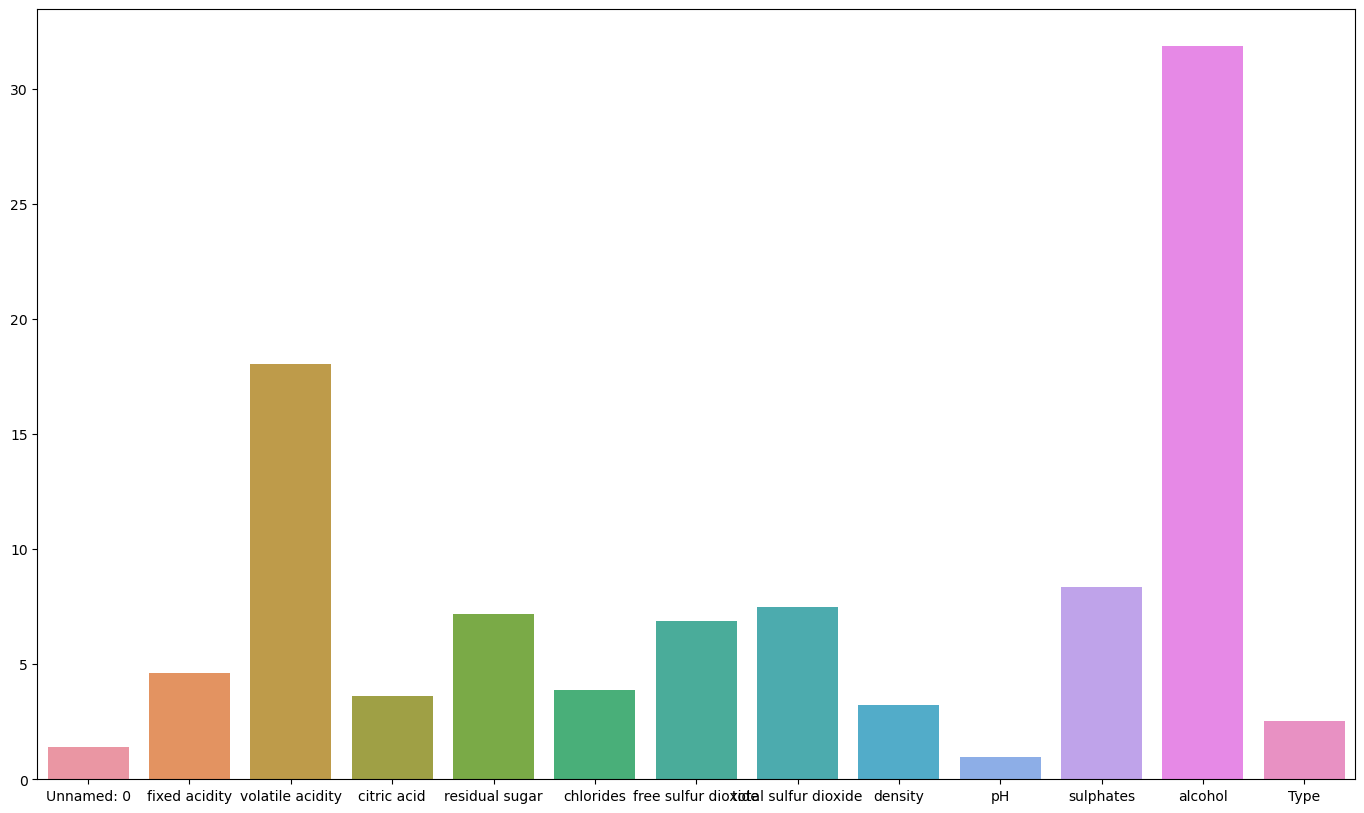

In [43]:
catboost_flow(quality_of_wine_X_train, quality_of_wine_X_test, quality_of_wine_y_train, quality_of_wine_y_test)